"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
penguin_dataset = pd.read_csv("penguins.csv")

In [ ]:
penguin_dataset.shape

(344, 8)

In [ ]:
penguin_dataset.dropna(inplace=True)
penguin_dataset.insert(0, "Bias", [1]*penguin_dataset.shape[0], True)
penguin_dataset.drop(['year'], axis=1, inplace = True)
penguin_dataset['index'] = range(0, len(penguin_dataset))

In [ ]:
penguin_dataset.shape

(333, 9)

In [ ]:
penguin_dataset.describe()

,Bias,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,index
count,333.0,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.0,43.992793,17.164865,200.966967,4207.057057,166.000000
std,0.0,5.468668,1.969235,14.015765,805.215802,96.273049
min,1.0,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,1.0,39.500000,15.600000,190.000000,3550.000000,83.000000
50%,1.0,44.500000,17.300000,197.000000,4050.000000,166.000000
75%,1.0,48.600000,18.700000,213.000000,4775.000000,249.000000
max,1.0,59.600000,21.500000,231.000000,6300.000000,332.000000


In [ ]:
penguin_dataset.head(6)

,Bias,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,index
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,1
2,1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2
4,1,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,3
5,1,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,4
6,1,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,5


In [ ]:
penguin_dataset.columns

Index(['Bias', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'index'],
      dtype='object')

In [ ]:
c1 = pd.get_dummies(penguin_dataset.species, prefix = "specie")
c1['index'] = range(0, len(penguin_dataset))
c2 = pd.get_dummies(penguin_dataset.island, prefix = "island")
c2['index'] = range(0, len(penguin_dataset))
penguin_dataset = penguin_dataset.merge(c1, on = 'index')
penguin_dataset = penguin_dataset.merge(c2, on = 'index')
penguin_dataset.drop('species', 1, inplace = True)
penguin_dataset.drop('island', 1, inplace = True)
penguin_dataset = penguin_dataset[["index", "Bias", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "specie_Adelie", "specie_Chinstrap", "specie_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
penguin_dataset['sex'] = penguin_dataset['sex'].astype('category')
categorical_columns = penguin_dataset.select_dtypes(['category']).columns
penguin_dataset[categorical_columns] = penguin_dataset[categorical_columns].apply(lambda x: x.cat.codes)
penguin_dataset = penguin_dataset

4. Normalize non-categorical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g)



*   a. Find the min and max values for each columnt item
*   b. Rescale dataset columns to the range from 0 to 1







In [ ]:
def Normalize(dataframe):

  temp_data = dataframe.copy()
  feature_set = {'bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g'}
  for feature in dataframe.columns:

    if feature in feature_set:
      minimum = dataframe[feature].min()
      maximum = dataframe[feature].max()

      temp_data[feature] = (dataframe[feature]-minimum) / (maximum - minimum)

  return temp_data

penguin_dataset = Normalize(penguin_dataset)

In [ ]:
penguin_dataset = penguin_dataset.sample(frac=1)

In [ ]:
penguin_dataset.drop(['index'], axis=1, inplace = True)
penguin_dataset.head()

,Bias,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,specie_Adelie,specie_Chinstrap,specie_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex
7,1,0.327273,0.535714,0.169492,0.138889,1,0,0,0,0,1,0
218,1,0.520000,0.226190,0.745763,0.555556,0,0,1,1,0,0,0
66,1,0.272727,0.488095,0.406780,0.236111,1,0,0,0,0,1,0
173,1,0.585455,0.142857,0.644068,0.527778,0,0,1,1,0,0,0
55,1,0.334545,0.952381,0.389831,0.472222,1,0,0,1,0,0,1


5. Choose your target Y. For this dataset, we have selected gender as our target


*   a. We have used binary classifier to predict which gender a penguin belongs to (female or male). In this case column sex can be used as Y (target)


6. Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y = 𝑁 x 1, where 𝑁 is a number of data samples and 𝑑 is a number of features.

In [ ]:
X = penguin_dataset.iloc[:,:-1].values   # get all rows  and all columns except last column
y = penguin_dataset.iloc[:,-1].values

In [ ]:
def divide_80_20(dataset):

  rows = dataset.shape[0]
  

  percent_80 = int(0.8*rows)
  percent_20 = int(0.2*rows)

  train = dataset[:percent_80]
  test = dataset[percent_80+1:]

  #train = temp.head(percent_80)
  #test = temp.tail(percent_20)


  return train, test

#def split_train_test(data, p) :
# return data.head(int(p * data.shape[0])), data.tail(int((1 - p) * data.shape[0]))

X_train, X_test = divide_80_20(X)
y_train, y_test = divide_80_20(y)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 11)
(66, 11)
(266,)
(66,)


In [ ]:
#N, d = X.shape
#weights = np.random.uniform(0,1 ,(d,1))
#weights
#learning_rate=1e-6  # accuracy  60.60
#iterations=100000
#learning_rate= 0.0025  # accuracy 87.87
#iterations= 100000

learning_rate = 0.01 # accuracy 90.90
iterations = 100000
#N, d = X.shape
#weights = np.zeros((d,1))
#weights = np.random.uniform(0,1 ,(d,1))
#bias = 1


In [ ]:

class LogitRegression():


  def __init__(self, learning_rate, iterations):         #inititalisation
    self.learning_rate = learning_rate
    self.iterations = iterations

  def sigmoid(self,z):                                         # sigmoid

    sig = 1.0/(1 + np.exp(-z))
    return sig


  def cost(self,y, y_pred):               

    cost = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
    return cost

  
  def gradient_descent(self,X, y, y_pred):

    rows, col = X.shape
    delta = y_pred - y
    dW = (1/rows) * np.dot(X.T , delta)

    return dW


  def predict(self,X,weight):
    
    result = np.dot(X,weight) 
    y_hat = self.sigmoid(result)
    

    output_list =[]   
    

    for element in y_hat:
      if element > 0.5:
        output_list.append(1)
      else:
        output_list.append(0)

    return np.array(output_list)


  def fit(self, x, y):
  
 
    rows, cols = x.shape
    
  
    N, d = x.shape
    #weights = np.zeros((d,1))
    weights = np.random.uniform(0,1 ,(d,1))
    print(weights.shape)
   
    y = y.reshape(rows,1)
    
    loss = []
    
   
    for iteration in range(iterations):
      
        #for i in range(rows):

       
        result = np.dot(x,weights)
        y_hat = self.sigmoid(result)
        
        dw  = self.gradient_descent(x, y, y_hat)
        
        weights -= self.learning_rate *dw

        l = self.cost(y, self.sigmoid(np.dot(x,weights)))
        loss.append(l)
        
    return weights , loss




  def accuracy(self, y_test, y_pred):

    positives = 0

    for item1, item2 in zip(y_test,y_pred):

      if item1 == item2:
        positives  +=1

    accuracy = positives / len(y_test)

    return accuracy




  

  
  


In [ ]:
model = LogitRegression(learning_rate, iterations)
print(model.learning_rate)
print(model.iterations)


0.01
100000


In [ ]:
new_weights, losses = model.fit(X_train, y_train)

(11, 1)


In [ ]:
new_weights

array([[-7.3381641 ],
       [ 5.72872814],
       [ 8.0655508 ],
       [ 2.10211081],
       [ 9.81395871],
       [-0.20022784],
       [-3.03721443],
       [-3.63622918],
       [-2.02963057],
       [-1.98878967],
       [-2.62209101]])

In [ ]:
print(model.learning_rate)
print(model.iterations)


0.01
100000


In [ ]:
len(losses)

100000

In [ ]:
new_weights.shape

(11, 1)

In [ ]:
y_pred = model.predict(X_test, new_weights)

In [ ]:
acc = model.accuracy(y_test, y_pred)

In [ ]:
print(acc)

0.9393939393939394


In [ ]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int8)

Text(0, 0.5, 'Loss')

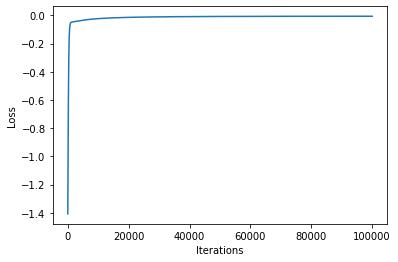

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")